In [2]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')


In [3]:
train_df = pd.read_csv('Train.csv')
test_df = pd.read_csv("Test.csv")
print(train_df.head())
print(test_df.head())

   Gender  Height (cm)  Weight (kg) Blood Pressure (s/d)  \
0    Male   171.148359    86.185197              151/109   
1    Male   172.946206    79.641937              134/112   
2  Female   155.945488    49.167058              160/101   
3  Female   169.078298    56.017921               133/94   
4  Female   163.758355    73.966304              170/106   

   Cholesterol Level (mg/dL)        BMI  Blood Glucose Level (mg/dL)  \
0                 259.465814  29.423017                   157.652848   
1                 263.630292  26.626847                   118.507805   
2                 207.846206  20.217553                   143.587550   
3                 253.283779  19.595270                   137.448581   
4                 236.119899  27.582078                   145.328695   

   Bone Density (g/cm²)  Vision Sharpness  Hearing Ability (dB)  ...  \
0              0.132868          0.200000             58.786198  ...   
1              0.629534          0.267312             54.63527

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_df['Gender'] = le.fit_transform(train_df['Gender'])
test_df['Gender'] = le.transform(test_df['Gender'])

In [5]:
features = ['Gender','Height (cm)','Weight (kg)','Cholesterol Level (mg/dL)','BMI','Blood Glucose Level (mg/dL)','Bone Density (g/cm²)','Vision Sharpness','Hearing Ability (dB)']
X = train_df[features]
y = train_df['Age (years)']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

X_test = test_df[features]
X_test = scaler.transform(X_test)

In [6]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train,y_train)

y_pred_rf = rf_reg.predict(X_val)
print('Random Forest Regression')
print('Mean Absolute Error:', mean_absolute_error(y_val, y_pred_rf))
print('Mean Squared Error', mean_squared_error(y_val, y_pred_rf))
print('R Score', r2_score(y_val, y_pred_rf))

Random Forest Regression
Mean Absolute Error: 4.705133333333333
Mean Squared Error 34.332919000000004
R Score 0.9162193032566763


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Make predictions
y_pred_dl = model.predict(X_val)

# Evaluate the model
print('Deep Learning Model:')
print('Mean Absolute Error:', mean_absolute_error(y_val, y_pred_dl))
print('Mean Squared Error:', mean_squared_error(y_val, y_pred_dl))
print('R² Score:', r2_score(y_val, y_pred_dl))


Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 3204.8242 - val_loss: 2638.7639
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2209.3027 - val_loss: 1020.6758
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 682.1558 - val_loss: 180.3809
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 224.8727 - val_loss: 140.0863
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 204.2146 - val_loss: 123.6740
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 180.5120 - val_loss: 104.8968
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 176.9616 - val_loss: 97.4662
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 163.6217 - val_loss: 83.8081
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 158.7380 - val_loss: 77.9660
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 154.1039 - val_loss: 74.2792
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 144.9990 - val_loss: 66.2071
Epoch 12/50
60/60 ━━━━━━━━━━━━━

In [8]:
y_test_pred_rf = rf_reg.predict(X_test)

submission_rf = pd.DataFrame({'Age (years)': y_test_pred_rf})
submission_rf.to_csv('submission_rf.csv', index = False)  #making file name submission_rf

In [9]:
y_test_pred_dl = model.predict(X_test)
submission_dl = pd.DataFrame({'Age(years)' : y_test_pred_dl.flatten()})
submission_dl.to_csv('submission_dl.csv', index = False)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go 

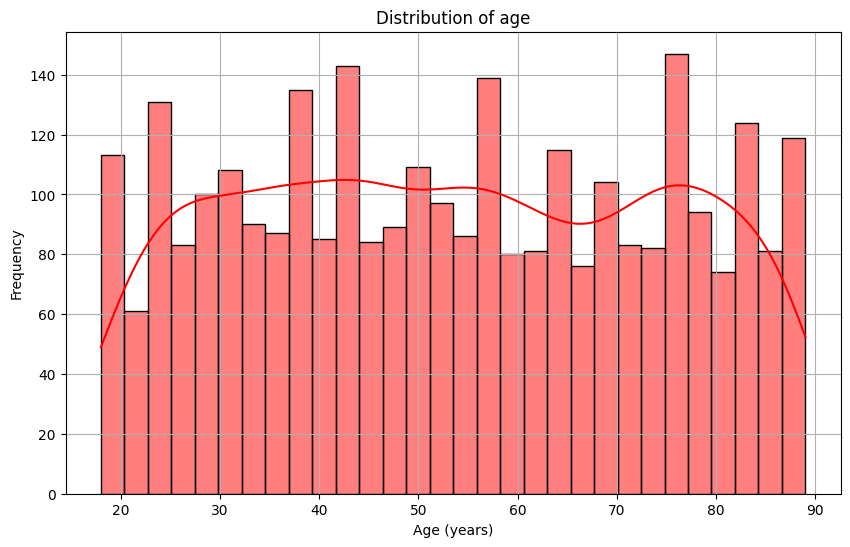

In [11]:
import plotly.io as pio
pio.renderers.default = 'vscode'

plt.figure(figsize=(10,6))
sns.histplot(train_df['Age (years)'], bins=30, kde=True, color='red')
plt.title('Distribution of age')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

fig = px.histogram(train_df, x = 'Age (years)', nbins=30, title='Distribution of Age', color_discrete_sequence=['brown'])
fig.update_layout(xaxis_title = 'Age (years)', yaxis_title = 'Frequency')
fig.show()



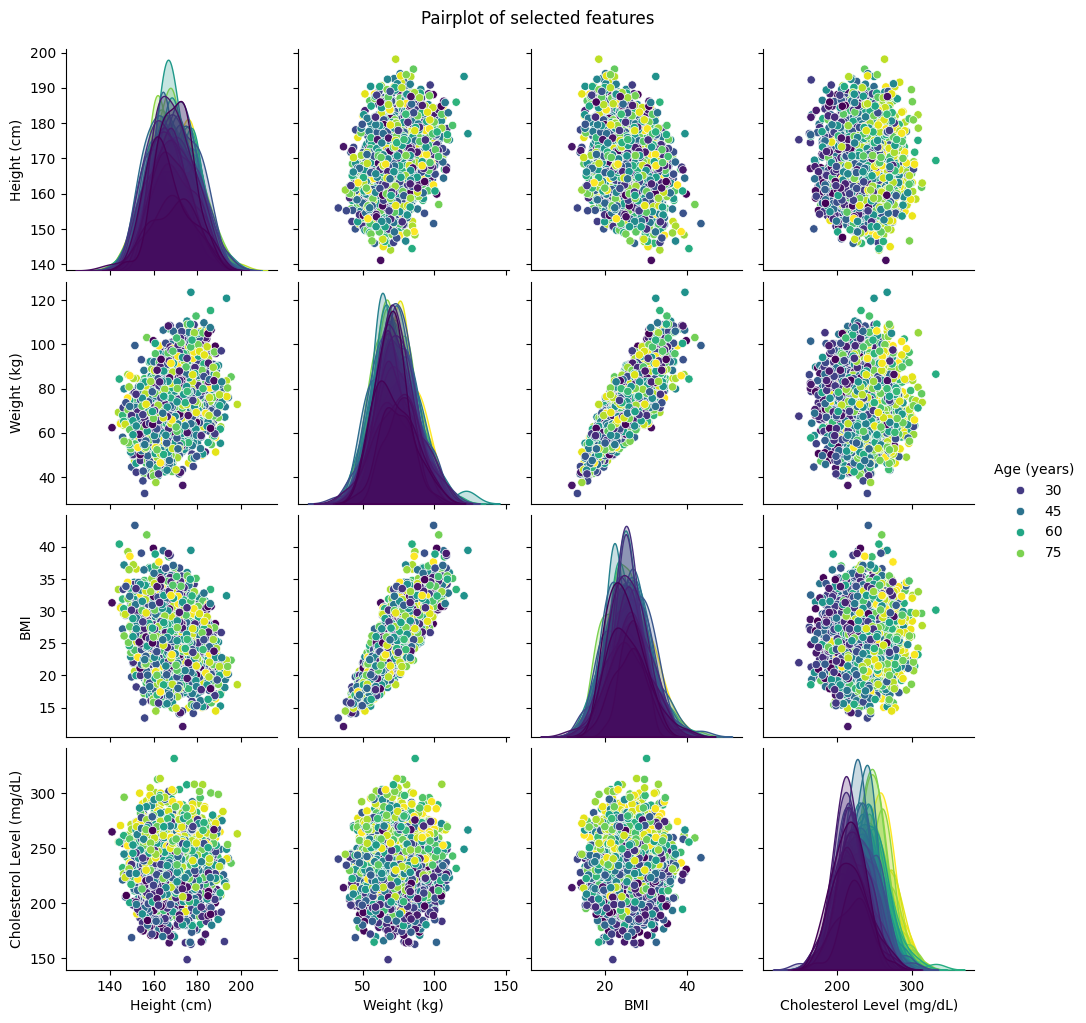

In [12]:
sf = ['Height (cm)', 'Weight (kg)', 'BMI', 'Cholesterol Level (mg/dL)', 'Age (years)']
sns.pairplot(train_df[sf], hue = 'Age (years)', palette='viridis')
plt.suptitle('Pairplot of selected features', y=1.02)
plt.show()

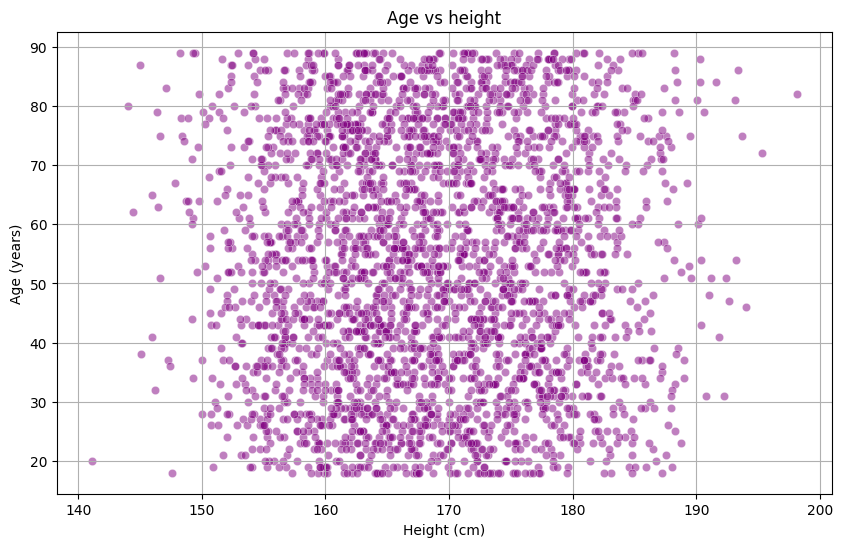

In [18]:
plt.figure(figsize=(10,6))
sns.scatterplot(x ='Height (cm)', y='Age (years)', data=train_df, color='purple', alpha=0.5)
plt.title('Age vs height')
plt.xlabel('Height (cm)')
plt.ylabel('Age (years)')
plt.grid(True)
plt.show()

fig = px.scatter(train_df, x='Height (cm)', y = 'Age (years)', color='Gender', title='Age vs Height', color_discrete_sequence=['purple', 'orange'])
fig.update_layout(xaxis_title='Height (cm)', yaxis_title='Age (years)')
fig.show()